# Logistic Regression Model

In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [45]:
data = pd.read_csv('data/heart.csv')

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Predict the variable y
0 = no heart disease
1 = heart disease

1    526
0    499
Name: target, dtype: int64


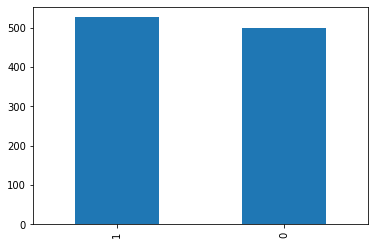

In [47]:
print(data.target.value_counts())
data.target.value_counts().plot.bar()

**Target numbers are pretty even.  526 have heart disease, 499 don't have heart disease**

# Dummy Variables

### categorical variables to use: 
- sex
- cp       : chest pain type
- fbs      : resting blood pressue (in mm HG on admission to the Hospital)
- restecg  : resting electrocardiographic results
- exang    : exercise induced angina
- slope    : the slope of the peak exercise ST segment
- ca       : number of major vessels (0-3) colored by flourosopy
-thal      : 

In [48]:
# creating dummy variables out of the cateforical data 

data_dummies = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
data_dummies.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
# looking at our new dummy data set to see which columns we need to add to our X
data_dummies.columns.to_list()

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'target',
 'sex_0',
 'sex_1',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']

In [50]:
# making X = our dummy variables we made
X = data_dummies.iloc[:, 6:]

# making y = our target
y = data.iloc[:, -1]

# SMOTE

In [51]:
# pip install imblearn

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3, random_state = 0)
columns = X_train.columns

In [55]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  726
Number of no subscription in oversampled data 363
Number of subscription 363
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# Recursive Feature Elimination (RFE)

- RFE is based on the idea to repeatedly construct a model and choose the best of worst perfoming feature
- Setting the features asside and then repeating the process with the rest of the features
- This process is applied until all features in the dataset are exhausted
- The goal of RFE is to select features by recursively considering smaller and smaller sets of features

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression()

In [62]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False  True False  True False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 6 4 1 5 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

# Implementing Logistic Regression Model

In [70]:
pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [73]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.316861
         Iterations 13
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.543      
Dependent Variable:    target              AIC:                 685.5644   
Date:                  2019-09-07 10:40    BIC:                 774.3484   
No. Observations:      1025                Log-Likelihood:      -324.78    
Df Model:              17                  LL-Null:             -710.12    
Df Residuals:          1007                LLR p-value:         8.0344e-153
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        13.0000                                             
---------------------------------------------------------------------------
           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------
sex_0      0.693

C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\606569\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
y_pred = logreg.predict(X_test)

In [80]:
print('accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

accuracy of logistic regression classifier on test set: 0.87


**Accuracy of our log reg model is 0.87**

# Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[122  23]
 [ 17 146]]


**This is telling us we have 122 + 146 correct predictions and 17 + 23 incorrect predictions**

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       145
           1       0.86      0.90      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



# ROC Curve

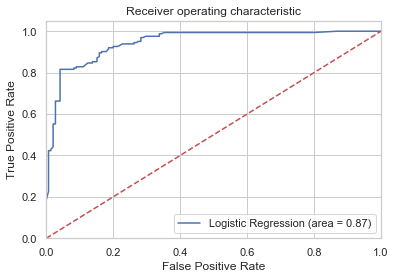

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- The dotted line represents the ROC curve of a purely random classifier
    - A good classifier stays as far away from that line as possible (toward the top-left corner)